### Perceptron

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Perceptron_training.csv')
df

,x1,x2,Target
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


- Splitting target and Features

In [3]:
Y = df['Target']
X = df.drop(columns='Target')

In [4]:
X.iloc[0]

x1    0
x2    0
Name: 0, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x1      4 non-null      int64
 1   x2      4 non-null      int64
 2   Target  4 non-null      int64
dtypes: int64(3)
memory usage: 228.0 bytes


In [6]:
df.shape

(4, 3)

In [7]:
df.describe()

,x1,x2,Target
count,4.00000,4.00000,4.00
mean,0.50000,0.50000,0.25
std,0.57735,0.57735,0.50
min,0.00000,0.00000,0.00
25%,0.00000,0.00000,0.00
50%,0.50000,0.50000,0.00
75%,1.00000,1.00000,0.25
max,1.00000,1.00000,1.00


- Splitting for plotting

In [27]:
df_tar_0 = df[df['Target']== 0]
df_tar_1 = df[df['Target']== 1]

In [26]:
df_tar_1

,x1,x2
3,1,1


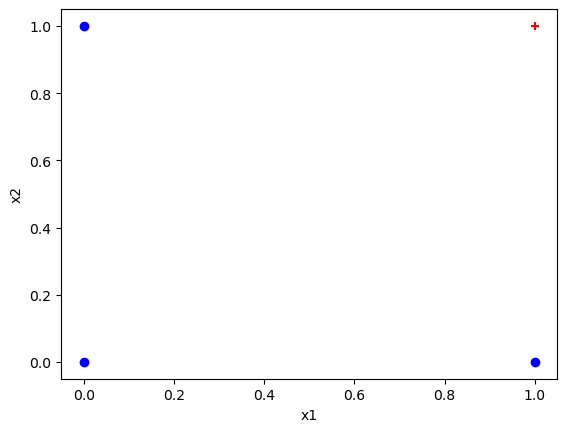

In [32]:
plt.scatter(x = df_tar_0['x1'],y = df_tar_0['x2'],marker='o',label = 'Target 0',color = 'blue')
plt.scatter(x = df_tar_1['x1'],y = df_tar_1['x2'],marker='+',label = 'Target 1',color = 'red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [9]:
class Perceptron():
    def fit(self,X: pd.DataFrame,Y: pd.DataFrame,l_r: float):
        self.X = X
        self.Y = Y
        self.equal = False
        while(self.equal==False):
            self.equal = True
            for i in range(len(X)):
                # weighted sum, summation function
                I_j = np.dot(self.param,X.iloc[i])
                # compare with target
                y_j = self.threshold(I_j)

                if y_j!=Y.iloc[i]:
                    self.equal = False
                    #update parameters
                    for k in range(len(self.param)):
                        self.param[k] = self.param[k] + l_r * (Y.iloc[i]-y_j) * self.X.iloc[i][k]
        print('They converge') 
        
    def get_param(self):
        return self.param
    
    def threshold(self,I_j):
        return 1 if I_j>=1 else 0
        
    def __init__(self,arr: list):
        self.param = arr

In [10]:
model = Perceptron([1.2,0.6])
model.fit(X,Y,0.5)
print('Parameter: ',model.get_param())

They converge
Parameter:  [0.7, 0.6]
